In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
def display(image, cmap = 'gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(image, cmap)

In [44]:
####################################################################
## Feature Matching                                               ##
##  1. Brute-force matching with ORB Descriptors                  ##
##  2. Brute-force matching with SIFT Descriptors and Ratio Test  ##
##  3. FLANN based Mathcer                                        ##
####################################################################

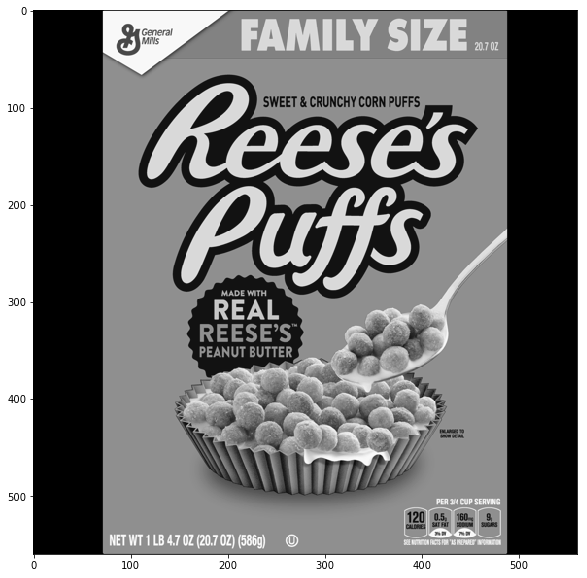

In [45]:
reeses = cv2.imread('../../DATA/reeses_puffs.png', 0)
display(reeses)

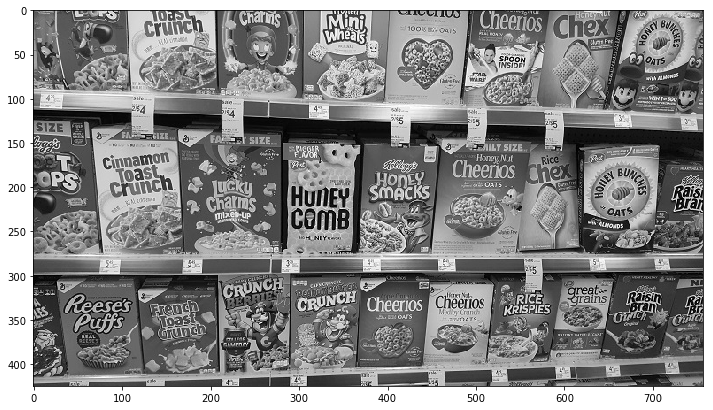

In [46]:
cereals = cv2.imread('../../DATA/many_cereals.jpg', 0)
display(cereals)

In [47]:
#################################
## FLANN based Mathcer         ##
##  fast and inaccurate result ##
#################################

In [48]:
sift = cv2.xfeatures2d.SIFT_create()

keypoint_1, description_1 = sift.detectAndCompute(reeses, None)
keypoint_2, description_2 = sift.detectAndCompute(cereals, None)

In [49]:
FLAN_INDEX_KDTREE = 0
index_params = dict(
    algorithm = FLAN_INDEX_KDTREE,
    trees = 5
)

search_params = dict(
    checks = 50
)

In [50]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [51]:
matches = flann.knnMatch(
    description_1,
    description_2,
    k = 2
)

In [52]:
### ADVANCED
matches_mask = [[0, 0] for i in range(len(matches))]

print(matches_mask[0])
print(matches_mask[1])
print(matches_mask[2])
print(len(matches_mask))

[0, 0]
[0, 0]
[0, 0]
1500


In [55]:
for i, (match_1, match_2) in enumerate(matches):
    if match_1.distance < 0.75 * match_2.distance:
        ### ADVANCED
        matches_mask[i] = [1, 0]

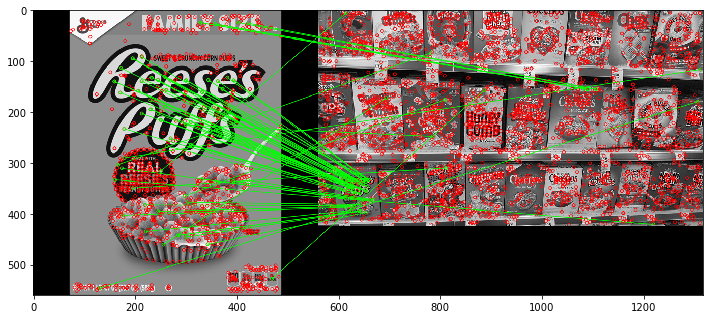

In [65]:
flann_matches = cv2.drawMatchesKnn(
    reeses,
    keypoint_1,
    cereals,
    keypoint_2,
    matches,
    None,
    **draw_params
)
display(flann_matches)